In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the csv file as a dataframe
df = pd.read_csv('/content/TSLA.csv')

In [ ]:
#viewing the top 5 entries of the dataset (You can pass in the number of entries you wish to see as an argument)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
#data analysis, to understand the relation between each feature
sns.pairplot(data=df)

In [ ]:
#to get some information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
#describe method gives the information of various aspects of each feature in the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Here, considering the 'Open' feature, 25% of values are less than or equal to 34.342498. Similarly, 50% of values are less than or equal to 213.035004 and 75% of values are less than or equal to 266.450012 (this includes the values under 25% and 75% as well)

**Some data preprocessing**

In [ ]:
df = df.drop(['Date'],axis=1)
df=df.drop(['Adj Close'],axis=1)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800


In [ ]:
df.tail(3)

,Open,High,Low,Close,Volume
2413,632.419983,650.880005,618.00000,640.809998,29005700
2414,640.000000,653.000000,632.52002,650.570007,15719300
2415,673.690002,786.140015,673.52002,780.000000,47065000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

In [ ]:
X

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [ ]:
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

With X and y ready, its time to split them into train and test (validation) sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
#creating an instance of Linear Regression model
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [ ]:
# The coefficients
print('Coefficients: \n', lrmodel.coef_)

Coefficients: 
 [-6.37615136e-01  8.59041324e-01  7.78186577e-01  9.30127197e-10]


In [ ]:
pred = lrmodel.predict(x_test)

Text(0, 0.5, 'Predicted Y')

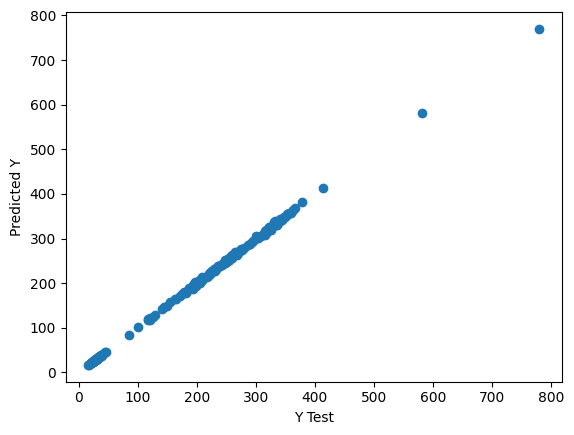

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.4275698559718044
MSE: 4.487426527715036
RMSE: 2.118354674674436


In [ ]:
#saving the model
import pickle
pickle.dump(lrmodel,open('teslapred.pkl','wb'))
new_model=pickle.load(open('teslapred.pkl','rb'))
new_model.predict(np.array([34,37,26,7890000]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.29822148])